In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as ss
from scipy.stats import expon
import pickle

# Task 1: Input Analysis
## Requirements:
Analyze the measured data to find what distributions the inter-arrival times of calls, the
locations where calls are generated, the call durations, and car speeds follow
respectively. You also need to find the parameter values of these distributions. (The
measured data are provided in the file “PCS_TEST_DETERMINSTIC”)

In [2]:
input_df = pd.read_excel("./PCS_TEST_DETERMINSTIC.xls")
input_df

,Arrival no,Arrival time (sec),Base station,Call duration (sec),velocity (km/h)
0,1,0.000000,18,76.133611,125.934254
1,2,0.067744,7,159.056244,95.510881
2,3,0.559184,6,179.465053,127.757456
3,4,0.625319,14,163.108320,134.310552
4,5,1.345066,2,95.054472,112.272359
...,...,...,...,...,...
9995,9996,13692.269647,4,116.119337,119.601001
9996,9997,13692.593630,16,37.970440,114.278648
9997,9998,13694.615122,3,31.919218,123.540944
9998,9999,13695.404091,12,386.621127,123.507947


## 1. Distribution of Inter-arrival Times

### 1.1. Distribution Visualization

In [3]:
# distribution of inter-arrival time of calls
arrival_times = input_df[["Arrival time (sec)"]]
arrival_times

,Arrival time (sec)
0,0.000000
1,0.067744
2,0.559184
3,0.625319
4,1.345066
...,...
9995,13692.269647
9996,13692.593630
9997,13694.615122
9998,13695.404091


In [4]:
# calculate inter-arrival times
interarrival_list = list(arrival_times["Arrival time (sec)"].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
)
arrival_times['interarrival_time'] = interarrival_list
arrival_times

/var/folders/0x/fy8jlvdd74ddy8g10p7tbm_w0000gn/T/ipykernel_33105/3516481826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrival_times['interarrival_time'] = interarrival_list


,Arrival time (sec),interarrival_time
0,0.000000,NaN
1,0.067744,0.067744
2,0.559184,0.491441
3,0.625319,0.066135
4,1.345066,0.719747
...,...,...
9995,13692.269647,1.300345
9996,13692.593630,0.323983
9997,13694.615122,2.021492
9998,13695.404091,0.788969


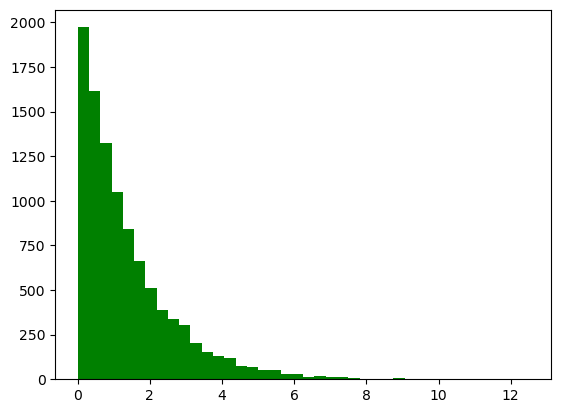

In [5]:
# plot histogram of distribution
num_bins = 40
   
n, bins, patches = plt.hist(arrival_times['interarrival_time'], num_bins, 
                            color ='green')

The distribution looks like it follows exponential distribution. 

In [6]:
loc, scale = expon.fit(arrival_times['interarrival_time'].tolist()[1:])

In [7]:
scale

1.3697918363207653

In [8]:
loc

2.5090155759244226e-05

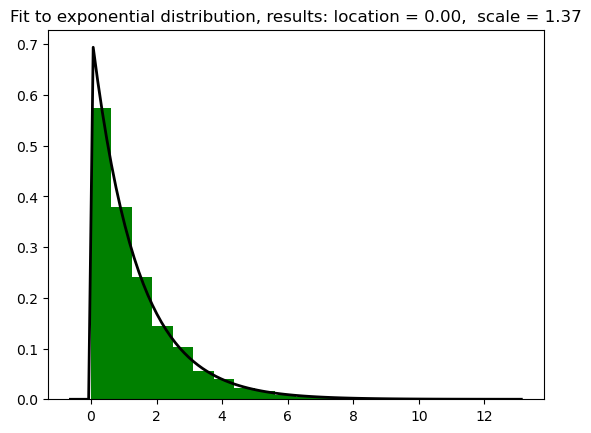

In [9]:
# Plot the histogram.
hist, _, _ = plt.hist(arrival_times['interarrival_time'].tolist()[1:], density = True, bins=20, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = expon.pdf(x, loc, scale)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit to exponential distribution, results: location = %.2f,  scale = %.2f" % (loc, scale)
plt.title(title)

plt.show()

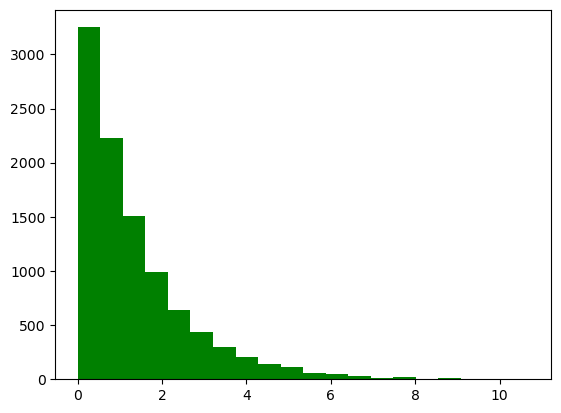

In [10]:
interrarrivals_generated = expon.rvs(loc=loc, scale=scale, size=10000)
plt.figure()
plt.hist(interrarrivals_generated, 20, color='green', label="Generated Interarrival Time Distribution")
plt.show()

### 1.2. Conclusion
From the scatter plot above, we could derive the conclusion that the distribution of arrival times follows exponential distribution a * np.exp(-b * x) + c with a = 2005.85994,  b = 0.704726220, c = -3.62280800

## 2. Distribution of locations where the call is generated

### 1.2. Distribution Visualization

In [11]:
base_stations = input_df[['Base station ']]
base_stations

,Base station
0,18
1,7
2,6
3,14
4,2
...,...
9995,4
9996,16
9997,3
9998,12


In [12]:
base_stations.describe()

,Base station
count,10000.00000
mean,10.54220
std,5.78662
min,1.00000
25%,6.00000
50%,11.00000
75%,16.00000
max,20.00000


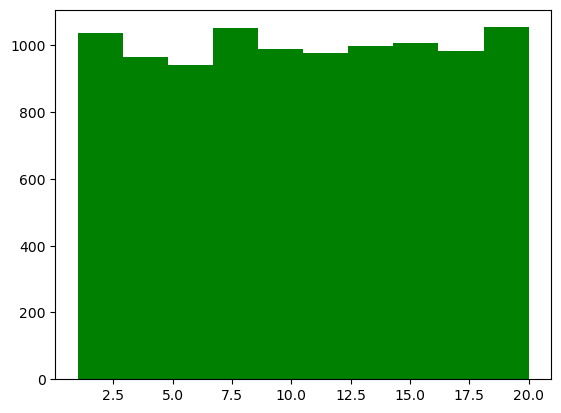

In [13]:
# plot histogram for distribution
num_bins = 10
n, bins, patches = plt.hist(base_stations['Base station '], num_bins, color = 'green')

In [14]:
n

array([1037.,  964.,  940., 1051.,  989.,  977.,  998., 1007.,  983.,
       1054.])

In [15]:
bins

array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ])

In [16]:
from scipy.stats import uniform
mu, std = uniform.fit(bins)

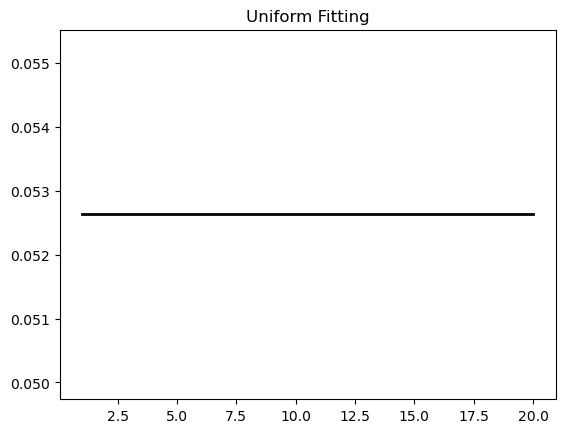

In [17]:
x = bins
p = uniform.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Uniform Fitting")
plt.show()

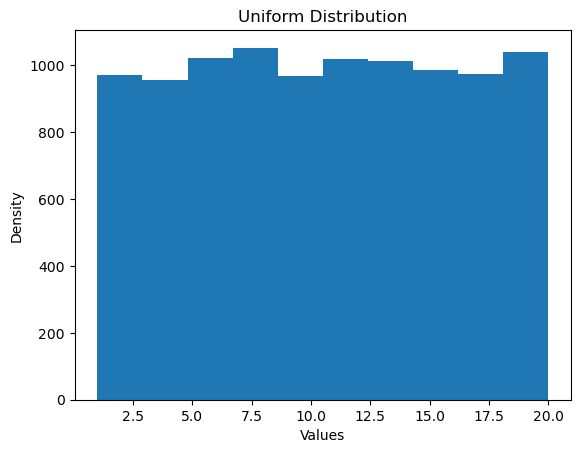

In [18]:
uniform_distributions = np.random.uniform(1, 20, 10000) 
count, bins, ignored = plt.hist(uniform_distributions, 10)
plt.title('Uniform Distribution')
plt.ylabel('Density')
plt.xlabel('Values')
plt.show()

## 3. Distribution of call durations

In [19]:
input_df.columns

Index(['Arrival no', 'Arrival time (sec)', 'Base station ',
       'Call duration (sec)', 'velocity (km/h)'],
      dtype='object')

In [20]:
call_durations = input_df[['Call duration (sec)']]
call_durations

,Call duration (sec)
0,76.133611
1,159.056244
2,179.465053
3,163.108320
4,95.054472
...,...
9995,116.119337
9996,37.970440
9997,31.919218
9998,386.621127


In [21]:
call_durations.describe()

,Call duration (sec)
count,10000.000000
mean,109.835901
std,99.138916
min,10.003952
25%,38.777914
50%,79.937560
75%,148.109589
max,1239.836192


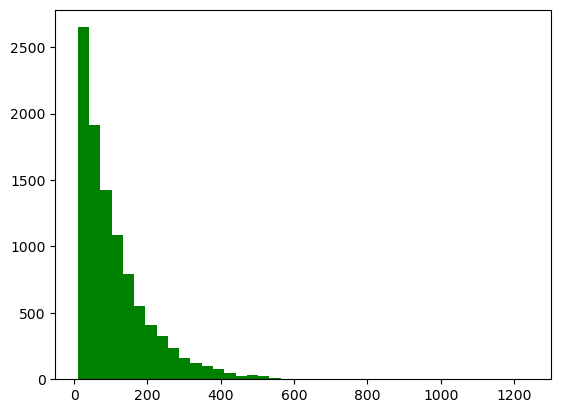

In [22]:
# plot histogram for distribution
num_bins = 40
n, bins, patches = plt.hist(call_durations['Call duration (sec)'], num_bins, color = 'green')

In [23]:
loc, scale = expon.fit(call_durations['Call duration (sec)'].tolist())

In [24]:
loc

10.003951603252272

In [25]:
scale

99.83194913549542

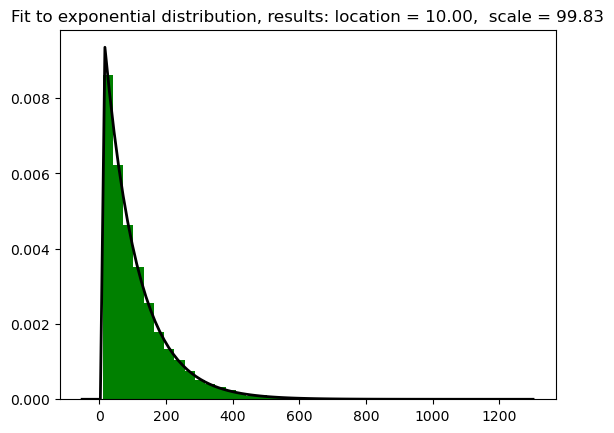

In [26]:
# Plot the histogram.
hist, _, _ = plt.hist(call_durations['Call duration (sec)'].tolist(), density = True, bins=40, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = expon.pdf(x, loc, scale)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit to exponential distribution, results: location = %.2f,  scale = %.2f" % (loc, scale)
plt.title(title)

plt.show()

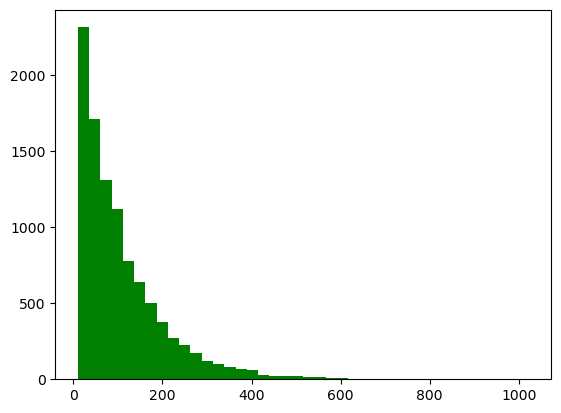

In [27]:
call_durations_generated = expon.rvs(loc=loc, scale=scale, size=10000)
plt.figure()
plt.hist(call_durations_generated, 40, color='green', label="Generated Interarrival Time Distribution")
plt.show()

## 4. Distribution of car speeds

In [28]:
speeds = input_df[['velocity (km/h)']]
speeds 

,velocity (km/h)
0,125.934254
1,95.510881
2,127.757456
3,134.310552
4,112.272359
...,...
9995,119.601001
9996,114.278648
9997,123.540944
9998,123.507947


In [29]:
speeds.describe()

,velocity (km/h)
count,10000.000000
mean,120.072098
std,9.019058
min,86.423152
25%,113.892676
50%,120.021618
75%,126.188008
max,151.501467


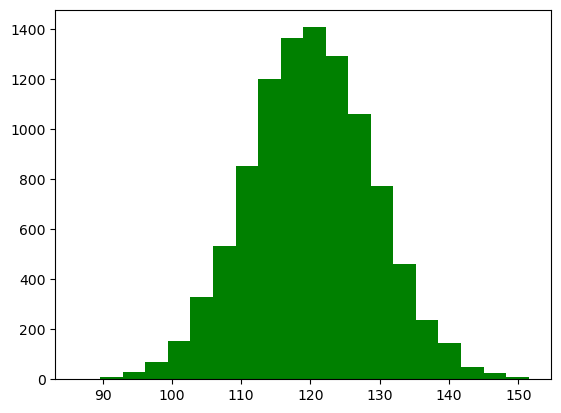

In [30]:
# plot histogram for distribution
num_bins = 20
n, bins, patches = plt.hist(speeds['velocity (km/h)'], num_bins, color = 'green')

In [31]:
from scipy.stats import norm
# Fit a normal distribution to the data:
mu, std = norm.fit(speeds['velocity (km/h)'])

In [32]:
mu

120.07209801685764

In [33]:
std

9.018606933727643

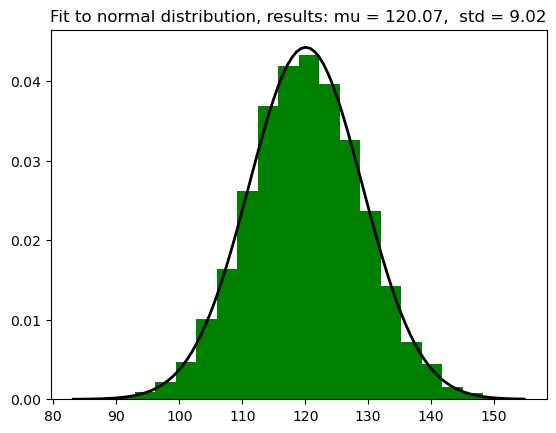

In [34]:
# Plot the histogram.
hist, _, _ = plt.hist(speeds['velocity (km/h)'], density = True, bins=20, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit to normal distribution, results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

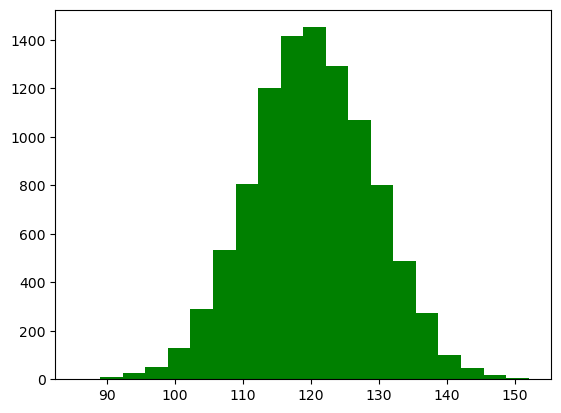

In [35]:
normal_nums = [np.random.normal(loc=mu, scale=std, size=None) for i in range(0, 10000)]
num_bins = 20
n, bins, patches = plt.hist(normal_nums, num_bins, color = 'green')

In [36]:
np.random.normal(loc=mu, scale=std, size=None)

124.13519066085702